Male and female column was split.
Replaced empty strings with NaN
Converted to float.
Filled the NaN in Female column with Total Population - Male Population.
No duplicates were found.


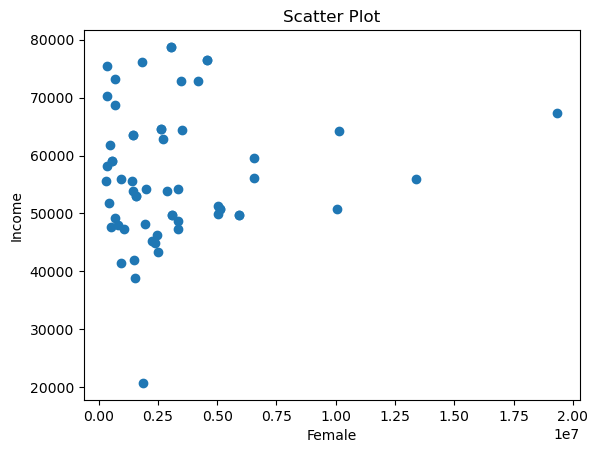

Now making histograms of races:


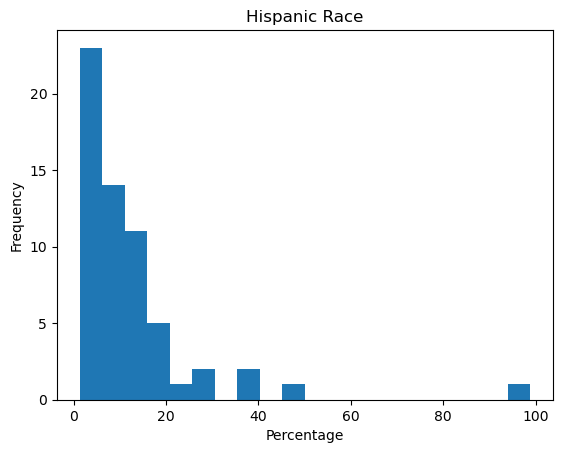

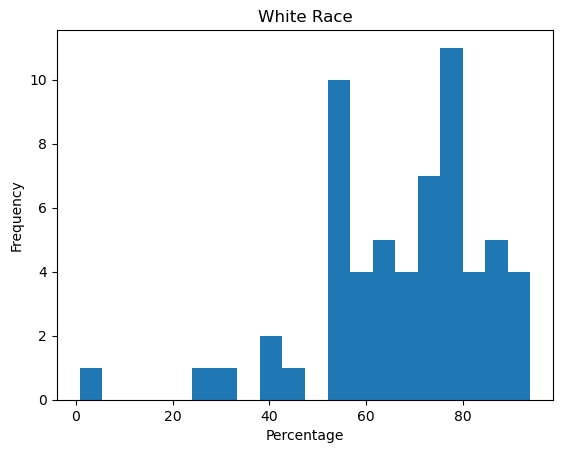

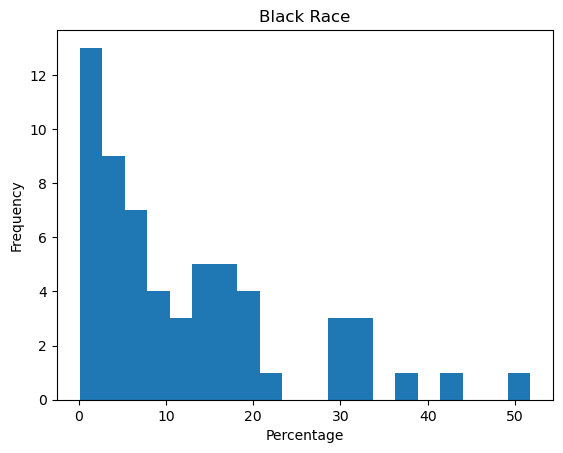

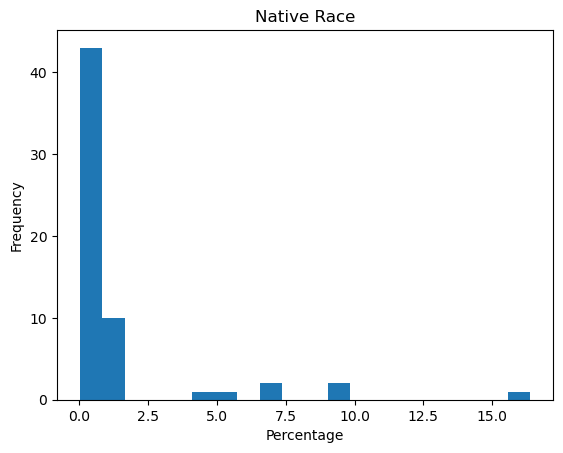

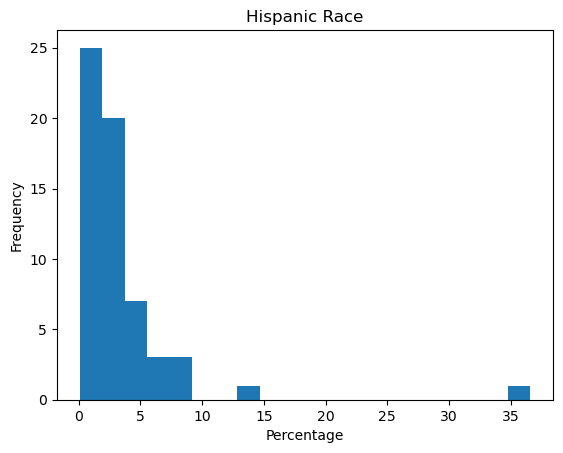

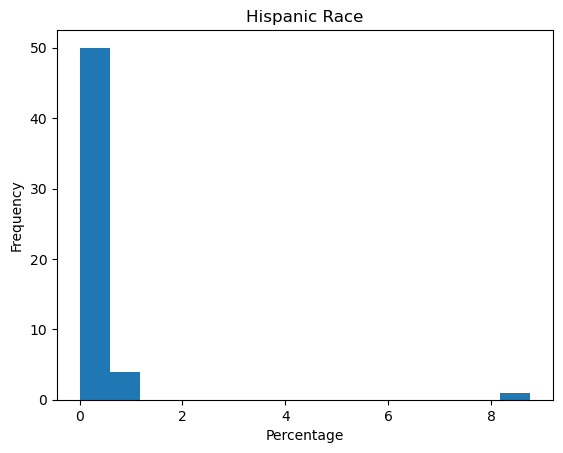

In [41]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt


files = glob.glob('*.csv')
dfs = []
for fp in files:
    dfs.append(pd.read_csv(fp))

us_census = pd.concat(dfs, ignore_index=True)

#print(us_census.dtypes)
#print(us_census.head())

#splitting gender columns
us_census[['Male', 'Female']] = us_census['GenderPop'].apply(lambda x: pd.Series(str(x).split("_")))
# Drop the original column
us_census = us_census.drop('GenderPop', axis=1)
print("Male and female column was split.")


#removing unnecessary characters 
us_census[['Hispanic','White','Black','Native','Asian','Pacific','Male', 'Female']] = us_census[['Hispanic','White','Black','Native','Asian','Pacific','Male', 'Female']].apply(lambda x: x.str[:-1])
us_census['Income']=us_census['Income'].str[1:]

#replacing empty strings with NaN
us_census[['Hispanic','White','Black','Native','Asian','Pacific','Male', 'Female']] = us_census[['Hispanic','White','Black','Native','Asian','Pacific','Male', 'Female']].replace('', np.nan).astype(float)
print("Replaced empty strings with NaN")

#convert to float accordigly
us_census[['Hispanic','White','Black','Native','Asian','Pacific','Male', 'Female','Income']]=us_census[['Hispanic','White','Black','Native','Asian','Pacific','Male', 'Female','Income']].astype(float)
print("Converted to float.")


#filling the NaNs in Female column
us_census['Female']=us_census['Female'].fillna(us_census['TotalPop']-us_census['Male'])
print("Filled the NaN in Female column with Total Population - Male Population.")

duplicates=us_census.duplicated()
#print(duplicates)
print("No duplicates were found.")

#Now plot Female population against income
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Female')
plt.ylabel('Income')
plt.title('Scatter Plot')
plt.show()


#Now making histogram
print("Now making histograms of races:")
plt.hist(us_census['Hispanic'],bins=20)
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Hispanic Race')
plt.show()


plt.hist(us_census['White'],bins=20)
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('White Race')
plt.show()

plt.hist(us_census['Black'],bins=20)
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Black Race')
plt.show()

plt.hist(us_census['Native'],bins=20)
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Native Race')
plt.show()

plt.hist(us_census['Asian'],bins=20)
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Hispanic Race')
plt.show()

plt.hist(us_census['Pacific'],bins=15)
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Hispanic Race')
plt.show()

